In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [2]:
raw_data = pd.read_csv("../data/raw_data.csv", index_col=0)
processed_data = pd.read_csv("../data/processed_data.csv", index_col=0)
processed_data.head()

,1,2,3,4,5,6,7,8,9,10,...,2099,2100,2101,2102,2103,2104,2105,2106,2107,2108
A,-0.248163,0.215320,-2.544178,-0.664153,-1.036544,0.341807,-2.094259,1.151056,-0.827764,0.096871,...,0.230313,0.591263,0.918083,1.826554,-0.831314,1.355468,1.042913,0.042019,-0.076278,0.110586
AAL,-0.288812,0.526781,-0.571731,-0.061054,0.528747,0.673683,-1.365156,0.336858,-1.332144,0.076344,...,-0.824516,0.358197,0.123998,-0.167982,1.108088,0.523537,-0.497572,-0.304097,-0.123727,-0.431203
AAPL,-1.428912,-1.129142,-2.365155,0.228236,0.823694,0.732015,-1.464459,1.133781,-1.371900,-0.324740,...,0.146843,0.041283,0.486334,-0.510215,0.903048,0.276603,0.606671,-0.025971,-0.051880,0.275982
ABBV,-0.291923,-0.027978,-0.218752,-1.696812,-1.972781,1.044939,-4.097187,3.977570,3.060007,-2.530897,...,-0.105844,-0.824226,-0.057532,0.094118,0.161921,0.078308,0.789364,0.169344,0.727356,-0.718254
ABT,-0.050395,-0.587979,-1.614974,-1.415724,0.062223,1.146507,-1.911301,1.307005,-0.933262,-0.213912,...,0.295705,-0.798772,-0.204654,0.009052,-0.016155,-0.513242,0.332576,0.141454,-0.525366,-0.592368


In [3]:
PCA_n_componenet = 40
pca = PCA(n_components=PCA_n_componenet)
principalComponents = pca.fit_transform(processed_data)

# store the principal component in a dataframe
column_name = ['pc' + str(i) for i in range(1, PCA_n_componenet+1)]
principalDf = pd.DataFrame(data = principalComponents, columns=column_name)
principalDf.index = [list(raw_data.columns)]
principalDf.to_csv("../data/principalDf.csv")
principalDf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39,pc40
A,3.010243,12.608278,0.277184,-6.282091,-4.771832,1.955251,-1.028999,11.021347,-4.143038,-2.139523,...,0.335022,-0.498651,3.918367,-0.075289,-0.511062,1.265639,0.278265,-2.959051,3.372210,3.250528
AAL,-15.431957,-3.039417,-3.041596,5.481056,9.742917,-8.047103,-7.834646,-3.168992,-6.769781,-8.447626,...,0.800469,-0.135023,0.448562,7.176086,-0.490621,1.037089,3.281216,-0.647292,0.236666,3.323956
AAPL,2.902709,15.968528,-0.286105,-0.147852,-1.991817,3.772536,-4.843341,-6.919114,-0.790755,0.083827,...,0.835664,-1.657784,-1.528167,1.682728,-2.258709,-1.324356,0.741585,0.911508,1.941093,-1.589999
ABBV,6.286245,1.226051,12.319934,0.452576,-8.154669,-8.776849,0.491969,5.510525,-5.927465,2.519648,...,1.889138,0.776257,-2.217391,0.009469,-0.828432,-1.613207,-1.204224,3.818667,1.516375,-0.089501
ABT,11.704934,9.633364,4.021468,-8.660472,-7.349779,-3.415020,-1.970274,9.109664,-6.118112,-1.764323,...,0.637975,-1.600521,-0.500051,1.673688,0.074094,-0.911661,-0.547563,2.976841,0.514031,1.028439


In [4]:
print(f"Varience preserved: {sum(pca.explained_variance_ratio_)}")
print(f"Varience distribution: \n{pca.explained_variance_ratio_}")

Varience preserved: 0.4911335321750723
Varience distribution: 
[0.08702545 0.06842352 0.03357243 0.02898496 0.02083842 0.0186717
 0.01687739 0.01508061 0.01293357 0.01204517 0.01077496 0.01061091
 0.00933849 0.00837364 0.00769335 0.00735662 0.00727092 0.00705165
 0.006608   0.00631685 0.0061424  0.00598    0.00573394 0.00544135
 0.00538019 0.00521318 0.00515726 0.00502489 0.00488261 0.00466761
 0.00448043 0.00446347 0.00437226 0.00423049 0.00418367 0.00412518
 0.00406323 0.00403    0.00390795 0.00380482]


Text(0.5, 0, 'pc3')

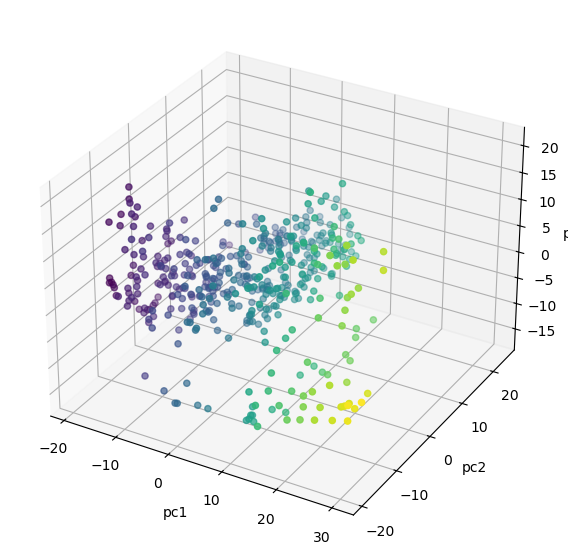

In [5]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
x = principalDf.loc[:,'pc1']
y = principalDf.loc[:,'pc2']
z = principalDf.loc[:,'pc3']
ax.scatter(x, y, z, c=x, marker='o')
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')

In [6]:
TSNE_n_component = 3
tsne = TSNE(n_components=TSNE_n_component, perplexity=28, early_exaggeration=9)
tsne_componenet = tsne.fit_transform(principalDf)
tsneDf = pd.DataFrame(data=tsne_componenet)
tsneDf.index = principalDf.index
tsneDf.to_csv("../data/tsneDF.csv")
tsneDf.head()

,0,1,2
A,13.799941,10.532969,-1.030204
AAL,-9.694422,-9.272758,0.516964
AAPL,0.214237,18.759165,-2.062645
ABBV,17.133244,3.435651,-7.875369
ABT,12.487381,8.524612,-5.642640


Text(0.5, 0, 'z')

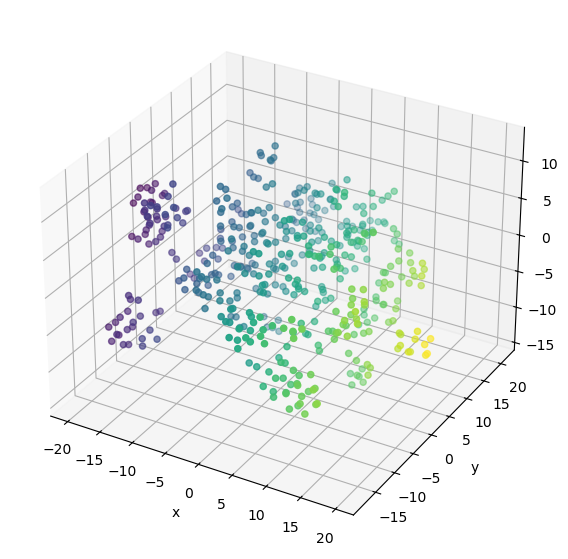

In [7]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
x = tsneDf.loc[:,0]
y = tsneDf.loc[:,1]
z = tsneDf.loc[:,2]
ax.scatter(x, y, z, c=x, marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')